In [1]:
#importing the libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import re
import nltk
from nltk import pos_tag, word_tokenize, PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
wordnet_lemmatizr=WordNetLemmatizer()
from sklearn.neighbors import NearestNeighbors

AMAZON WEBSITE

In [2]:
df = pd.read_csv('/content/drive/MyDrive/product.csv')

print("Shape: %s" % str(df.shape))
print("Column names: %s" % str(df.columns))

df.head()

Shape: (11346, 12)
Column names: Index(['Unnamed: 0', 'asin', 'avg.rating', 'avg.helpful.ratio', 'also_bought',
       'also_viewed', 'brand', 'categories', 'description', 'price',
       'salesRank', 'title'],
      dtype='object')


,Unnamed: 0,asin,avg.rating,avg.helpful.ratio,also_bought,also_viewed,brand,categories,description,price,salesRank,title
0,1,7806397051,2.50,NaN,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B0...","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B0...",COKA,"[['Beauty', 'Makeup', 'Face', 'Concealers & Ne...",An extensive range of 15 multiple vibrant long...,5.04,{'Beauty': 10486},WAWO 15 Color Professionl Makeup Eyeshadow Cam...
1,2,9759091062,3.09,NaN,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B0...","['B0054GBXOW', 'B0054GLD1U', 'B006VDOPPQ', 'B0...",Xtreme Brite,"[['Beauty', 'Hair Care', 'Styling Products', '...",Xtreme Brite Brightening gel is a highly conc...,19.99,{'Beauty': 52254},Xtreme Brite Brightening Gel 1oz.
2,3,9788072216,5.00,NaN,"['B006C5OHSI', 'B006P14842', 'B0072CSVB4', 'B0...","['B0072CSVB4', 'B005YWBOHW', 'B00CGOUL2A', 'B0...",Prada,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de Pa...",Prada Candy By Prada Eau De Parfum Spray 1.7 O...,65.86,{'Beauty': 78916},Prada Candy By Prada Eau De Parfum Spray 1.7 O...
3,4,9790790961,4.60,NaN,"['B007P7OPQQ', 'B0017JT658', 'B0084HM1DA', 'B0...","['B005M2AQRI', 'B000VOHKK8', 'B0017JT658', 'B0...",Versace,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de To...",Versace Bright Crystal Perfume for Women 3 oz ...,52.33,{'Beauty': 764},Versace Bright Crystal Eau de Toilette Spray f...
4,5,9790794231,4.50,NaN,"['B0019M21OQ', 'B000E7YM8K', 'B0006V31FY', 'B0...","['B000E7YM8K', 'B0019M21OQ', 'B0006V31FY', 'B0...",,"[['Beauty', 'Fragrance', ""Women's"", 'Eau de Pa...",STELLA For Women By STELLA MCCARTNEY 1.7 oz ED...,NaN,{'Beauty': 142503},Stella McCartney Stella


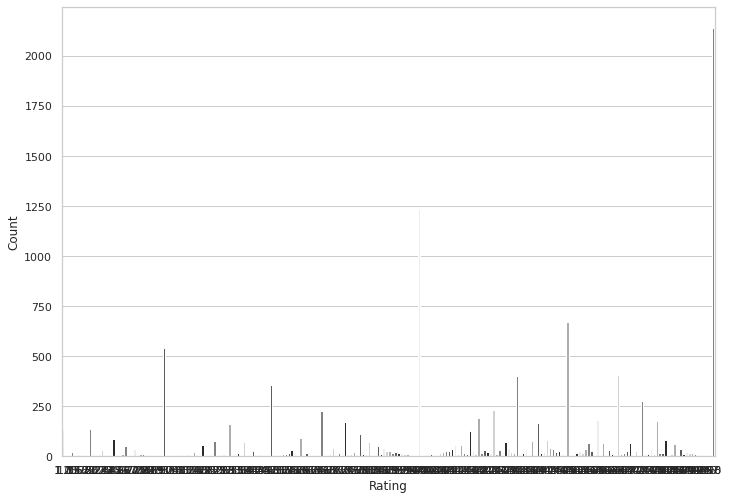

In [3]:
# Rating frequency
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='avg.rating', data=df, palette=sns.color_palette('Greys'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

In [4]:
df.shape

(11346, 12)

In [5]:
df.isnull().sum()

Unnamed: 0               0
asin                     0
avg.rating               0
avg.helpful.ratio    10554
also_bought              0
also_viewed              0
brand                   16
categories               0
description            682
price                  405
salesRank                0
title                    0
dtype: int64

In [6]:
df=df.drop(labels='categories', axis=1)
df=df.drop(labels='avg.helpful.ratio', axis=1)
df=df.drop(labels='brand', axis=1)
df=df.drop(labels='description', axis=1)
df=df.drop(labels='title', axis=1)
df=df.drop(labels='Unnamed: 0', axis=1)
df


,asin,avg.rating,also_bought,also_viewed,price,salesRank
0,7806397051,2.50,"['B00KR26VFE', 'B00E7LQHZ0', 'B00BMW24TU', 'B0...","['B008GOR6O0', 'B00EOFEKF8', 'B00IIFVJZ4', 'B0...",5.04,{'Beauty': 10486}
1,9759091062,3.09,"['B0054GLD1U', 'B003BRZCUC', 'B0054GBXOW', 'B0...","['B0054GBXOW', 'B0054GLD1U', 'B006VDOPPQ', 'B0...",19.99,{'Beauty': 52254}
2,9788072216,5.00,"['B006C5OHSI', 'B006P14842', 'B0072CSVB4', 'B0...","['B0072CSVB4', 'B005YWBOHW', 'B00CGOUL2A', 'B0...",65.86,{'Beauty': 78916}
3,9790790961,4.60,"['B007P7OPQQ', 'B0017JT658', 'B0084HM1DA', 'B0...","['B005M2AQRI', 'B000VOHKK8', 'B0017JT658', 'B0...",52.33,{'Beauty': 764}
4,9790794231,4.50,"['B0019M21OQ', 'B000E7YM8K', 'B0006V31FY', 'B0...","['B000E7YM8K', 'B0019M21OQ', 'B0006V31FY', 'B0...",NaN,{'Beauty': 142503}
...,...,...,...,...,...,...
11341,B00L5KTZ0K,5.00,"['B00JJOEV9Y', 'B00LSXYC6G', 'B00KWP8ZIM', 'B0...","['B00L8HA5L8', 'B00L2NX8YE', 'B00L8FDIZU', 'B0...",18.36,{'Beauty': 26198}
11342,B00L6Q3BH6,4.75,"['B00JH29K6M', 'B00JH2B182', 'B004W4P7AI', 'B0...","['B00JH2B182', 'B00JH29K6M', 'B00KNUC564', 'B0...",27.50,{'Health & Personal Care': 3006}
11343,B00LCEROA2,5.00,"['B00LNVW1IE', 'B00JYKGFWY', 'B00ELN94GS', 'B0...","['B00ELN94GS', 'B00EP2P3ME', 'B00DQ2I0JC', 'B0...",19.99,{'Beauty': 7597}
11344,B00LG63DOM,4.80,"['B00JJOEV9Y', 'B00KWP8ZIM', 'B00LDGV15I', 'B0...","['B00LORXVUE', 'B00LORY6IA', 'B00KK62714', 'B0...",36.00,{'Beauty': 58521}


In [7]:
# Mean rating for each Product

product_rating = df.groupby('asin')['avg.rating'].mean()
product_rating.head()

asin
7806397051    2.50
9759091062    3.09
9788072216    5.00
9790790961    4.60
9790794231    4.50
Name: avg.rating, dtype: float64

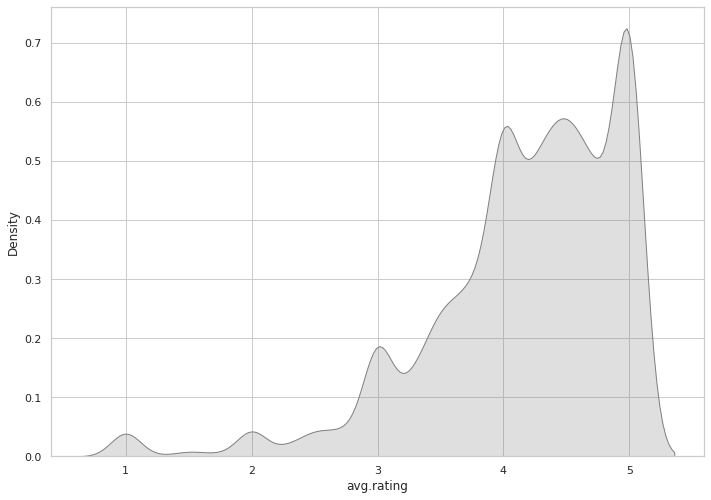

In [8]:
# Mean rating KDE distribution

ax = sns.kdeplot(product_rating, shade=True, color='grey')
plt.show()

We can notice a large spike in the mean rating at value 5. This is a valuable indicator that points to the skewness of the data. Hence we need to further analyse this issue.

In [9]:
#data tranforming
# Data frame with calculated fields and measures

unique_products_list = df.asin.unique()
data_model = pd.DataFrame({'Rating': product_rating[unique_products_list]})
data_model.head()

,Rating
asin,
7806397051,2.50
9759091062,3.09
9788072216,5.00
9790790961,4.60
9790794231,4.50


In [10]:
print("Data model shape (number of data points): %s" % str(data_model.shape))


Data model shape (number of data points): (11346, 1)


In [11]:
#Summarise Rating

print(data_model.Rating.describe())

count    11346.000000
mean         4.163377
std          0.770957
min          1.000000
25%          3.800000
50%          4.330000
75%          4.750000
max          5.000000
Name: Rating, dtype: float64


In [12]:
# Normalization function to range 0 - 10

def normalize(values):
    mn = values.min()
    mx = values.max()
    return(10.0/(mx - mn) * (values - mx)+10)
    

In [13]:
data_model_norm = normalize(data_model)
data_model_norm.head()

,Rating
asin,
7806397051,3.750
9759091062,5.225
9788072216,10.000
9790790961,9.000
9790794231,8.750


In [14]:
#Setting up the model

# Recommend 20 similar items
engine = KNeighborsClassifier(n_neighbors=20)

# Training data points
data_points = data_model_norm[[ 'Rating']].values

#Training labels
labels = data_model_norm.index.values

print("Data points: ")
print(data_points)
print("Labels: ")
print(labels)

engine.fit(data_points, labels)

Data points: 
[[ 3.75 ]
 [ 5.225]
 [10.   ]
 ...
 [10.   ]
 [ 9.5  ]
 [10.   ]]
Labels: 
['7806397051' '9759091062' '9788072216' ... 'B00LCEROA2' 'B00LG63DOM'
 'B00LLPT4HI']


KNeighborsClassifier(n_neighbors=20)

In [15]:
# Enter product ID to get a list of 20 recommended items

# User entered value
product_id = '9759091062'

product_data = [data_model_norm.loc[product_id][['Rating']].values]

recommended_products = engine.kneighbors(X=product_data, n_neighbors=20, return_distance=False)

# List of product IDs form the indexes

products_list = []

for each in recommended_products:
    products_list.append(data_model_norm.iloc[each].index)

print("Recommended products: ")
print(products_list)



Recommended products: 
[Index(['B003EN4T2U', 'B006OHM542', '9759091062', 'B0034BUQ42', 'B005F5J5Z6',
       'B00FF5B31U', 'B009T47YZ2', 'B0068Y6CA4', 'B009YVCSYM', 'B001CS6BIY',
       'B0042WIHNY', 'B001KYNVLU', 'B002GCKVJA', 'B00GBL5GDS', 'B002MOBZSS',
       'B004ZC13OG', 'B0027U1D5W', 'B0009V1YR8', 'B002KFOX38', 'B004INQ65S'],
      dtype='object', name='asin')]


FLIPKART WEBSITE

In [16]:
df1=pd.read_csv("/content/drive/MyDrive/flipkart_com-ecommerce_sample.csv")

In [17]:
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [18]:
df1.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [20]:
df1.shape

(20000, 15)

In [22]:

print("Shape: %s" % str(df1.shape))
print("Column names: %s" % str(df1.columns))


Shape: (20000, 15)
Column names: Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


In [23]:
# Unique Users and Products

print("Unique UserID count: %s" % str(df1.uniq_id.nunique()))
print("Unique ProductID count: %s" % str(df1.pid.nunique()))

Unique UserID count: 20000
Unique ProductID count: 19998


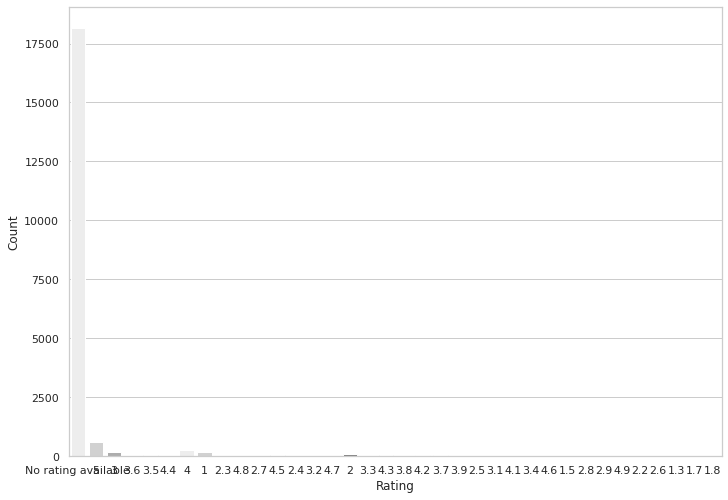

In [25]:
# Rating frequency

sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set_style('whitegrid')
ax = sns.countplot(x='product_rating', data=df1, palette=sns.color_palette('Greys'))
ax.set(xlabel='Rating', ylabel='Count')
plt.show()

In [29]:
#preprocessing
def clean_product_type(dataframe):
    document=list(dataframe['product_category_tree'])
    product_types=[re.findall(r'\"(.*?)\"', sentence) for sentence in document]
    product_types=[' '.join(listed_items) for listed_items in product_types]
    return(product_types)

In [30]:
def clean_categories(dataframe):
    document=list(dataframe['product_category_tree'].values)
    categories=[re.findall(r'name=(.*?)}',sentence) for sentence in document]
    categories=[' '.join(word) for word in categories]
    return(categories)

In [31]:
def special_characters_cleaning(document):
    sentences=[]
    for sentence in document:
        sentences.append(re.sub('[^a-zA-Z0-9\n\.]',' ',str(sentence)))
    return(sentences)

In [32]:
def lemmetize_document(document):
    sentences=[]
    for sentence in document:
        word=[wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]
        sentences.append(' '.join(words))
    return(sentences)

In [33]:
def categories_extraction(dataframe):
    categories=[word for item in dataframe['categories'] for word in item.split()]
    categories=list(set(categories))
    return(categories)

In [34]:
def save_categories(dataframe):
    pass

In [35]:
def pre_processing_document(document):
    document=special_characters_cleaning(document)
    document=lemmetize_document(document)
    document=[sentence.title() for sentence in document]
    return(document)

In [36]:
def extract_categories_from_description(document,categories):
    extracted_categories=[]
    for sentence in document:
        extracted_categories.append(' '.join(set(categories).intersection(set(word_tokenize(sentence)))))
        return(extracted_categories)

In [37]:
lemmetize= WordNetLemmatizer()
stemmer=PorterStemmer()

In [38]:
df1["products"]=clean_product_type(df1)

In [39]:
df1["categories"]=clean_categories(df1)

In [42]:
categories= list(set(df1['product_category_tree'].values))
categories= [item.split() for item in df1['product_category_tree']]
categories= [word.lower() for listed_item in categories for word in listed_item]
categories= list(set(categories))

In [43]:
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,products,categories
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture >> Living Room Furniture >> Sofa Bed...,
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear >> Women's Footwear >> Ballerinas >> ...,
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies >> Grooming >> Skin & Coat Care >...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care >> Baby & Kids Gifts >> Stickers >> ...,
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care >> Baby & Kids Gifts >> Stickers >> ...,
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""h

In [44]:
df1['detailed_description']= df1['products']+ df1['brand']+df1['product_name']

In [45]:
df1

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,products,categories,detailed_description
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",,"Clothing >> Women's Clothing >> Lingerie, Slee..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",Furniture >> Living Room Furniture >> Sofa Bed...,,Furniture >> Living Room Furniture >> Sofa Bed...
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",Footwear >> Women's Footwear >> Ballerinas >> ...,,Footwear >> Women's Footwear >> Ballerinas >> ...
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","Clothing >> Women's Clothing >> Lingerie, Slee...",,"Clothing >> Women's Clothing >> Lingerie, Slee..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...",Pet Supplies >> Grooming >> Skin & Coat Care >...,,Pet Supplies >> Grooming >> Skin & Coat Care >...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...",Baby Care >> Baby & Kids Gifts >> Stickers >> ...,,Baby Care >> Baby & Kids Gifts >> Stickers >> ...
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specificat

In [46]:
document= list(df1['detailed_description'].values)
document= special_characters_cleaning(document)

In [47]:
tfidf= TfidfVectorizer(stop_words= 'english', vocabulary= categories)
data= tfidf.fit_transform(document)

In [48]:
from sklearn.neighbors import NearestNeighbors
nn= NearestNeighbors(algorithm= 'brute', n_neighbors= 20).fit(data)


In [49]:
text= df1[df1['brand']== "FabHomeDecor"]['detailed_description'].values
result = nn.kneighbors(tfidf.transform(text))
for col in tfidf.transform(text).nonzero()[1]:
    print(tfidf.get_feature_names()[col], ' - ', tfidf.transform(text)[0, col])

living  -  0.1729910237070467
furniture  -  0.31267075585498627
bed  -  0.28650919452707707
beds  -  0.23771412515246718
fabric  -  0.3404245070225777
finish  -  0.19805109200546914
fabhomedecor  -  0.25687140760783667
futons  -  0.25687140760783667
room  -  0.17792395156869212
double  -  0.3362594739889644
sofa  -  0.5494627319447266
living  -  0.1729910237070467
furniture  -  0.31267075585498627
bed  -  0.28650919452707707
beds  -  0.23771412515246718
fabric  -  0.3404245070225777
finish  -  0.19805109200546914
fabhomedecor  -  0.25687140760783667
futons  -  0.25687140760783667
room  -  0.17792395156869212
double  -  0.3362594739889644
sofa  -  0.5494627319447266
living  -  0.1729910237070467
furniture  -  0.31267075585498627
bed  -  0.28650919452707707
beds  -  0.23771412515246718
fabric  -  0.3404245070225777
finish  -  0.19805109200546914
fabhomedecor  -  0.25687140760783667
futons  -  0.25687140760783667
room  -  0.17792395156869212
double  -  0.3362594739889644
sofa  -  0.549462